<a href="https://colab.research.google.com/github/everestso/61.67.71.73..18.19.20.21/blob/master/c174f19tree3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
%matplotlib inline
# Important for using matplotlib w/ Ipython Notebook
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import graphviz as gv

import random
import numpy as np

import sys
import os

In [0]:
RED = 1
BLACK = 0
class Node:
  def __init__(self, key):
    self.p=None;
    self.key = key
    self.left = None
    self.right = None

class Tree:
  def __init__(self):
    self.nil = Node(-1)
    self.nil.color = BLACK
    self.root = self.nil
    

In [0]:
def GNode(G, x):
  if x.color == RED:
    G.node(str(x.key), color='red', style='filled', fontcolor='white')
  else:
    G.node(str(x.key), color='black', style='filled', fontcolor='white')
    
def DisplayTreeWalk(G, T, x):
  if x!=T.nil:
    if x.left != T.nil:
      GNode(G, x.left)
      G.edge(str(x.key),str(x.left.key), label = '', color='blue')
      DisplayTreeWalk(G, T, x.left)
    else:
      G.nilCount += 1
      G.node(str(-1*G.nilCount), label = "nil", color='black', fontcolor='black', penwidth="1", size="2")
      G.edge(str(x.key),str(-1*G.nilCount), label = '', color='blue')
   
    if x.right != T.nil:
      GNode(G, x.right)
      G.edge(str(x.key),str(x.right.key), label = '', color='red')
      DisplayTreeWalk(G, T, x.right)
    else:
      G.nilCount += 1
      G.node(str(-1*G.nilCount), label = "nil", color='black', fontcolor='black', penwidth="1", size="2")
      G.edge(str(x.key),str(-1*G.nilCount), label = '', color='red')
    
def DisplayTree(T):
    'Plots a tree'
    G = gv.Graph(filename='graph', format='png')
    G.nilCount = 0
    GNode(G, T.root)
    DisplayTreeWalk(G, T, T.root)
    
    G.render()
    img=mpimg.imread('graph.png')

    fig, ax = plt.subplots(frameon=False)
    fig.set_size_inches(15,15)
    imgplot = plt.imshow(img)

    ax.axis('off')
    plt.box(on=None) 
    plt.show()  

In [0]:
def LeftRotate(T, x):
  y = x.right       # set y
  x.right = y.left  # turn y’s left subtree into x’s right subtree
  if y.left != T.nil:
    y.left.p = x
  y.p = x.p         # link x’s parent to y
  if x.p == T.nil:
    T.root = y
  elif x == x.p.left:
    x.p.left = y
  else:
    x.p.right = y
  y.left = x
  x.p = y
  
def RightRotate(T, x):
  y = x.left       # set y
  x.left = y.right  # turn y’s right subtree into x’s left subtree
  if y.right != T.nil:
    y.right.p = x
  y.p = x.p         # link x’s parent to y
  if x.p == T.nil:
    T.root = y
  elif x == x.p.left:
    x.p.left = y
  else:
    x.p.right = y
  y.right = x
  x.p = y

In [0]:

def RBInsertFixup(T, z):
  while z.p.color==RED:
    if z.p==z.p.p.left:
      y = z.p.p.right
      if y.color==RED:
        z.p.color = BLACK    ## case 1
        y.color = BLACK      ## case 1
        z.p.p.color = RED    ## case 1
        z=z.p.p              ## case 1
      else:
        if z==z.p.right:
          z = z.p              ## case 2
          LeftRotate(T, z)     ## case 2
        z.p.color = BLACK      ## case 3
        z.p.p.color = RED      ## case 3
        RightRotate(T, z.p.p)  ## case 3 
    #### else  (same as then clausewith “right” and “left” exchanged)
    else:
      z.p.color = BLACK  ### Exit for now
  T.root.color = BLACK
    
def RBTreeInsert(T, z):
  y=T.nil
  x=T.root
  while (x != T.nil):
    y = x
    if z.key < x.key:
      x = x.left
    else:
      x = x.right
  z.p = y
  if y==T.nil:
    T.root = z
  elif z.key < y.key:
    y.left = z
  else:
    y.right = z
  z.left = T.nil
  z.right = T.nil
  z.color = RED
  DisplayTree(T)
  RBInsertFixup(T, z)
    
def InorderTreeWalk(T, x):
  if x!=T.nil:
    InorderTreeWalk(T, x.left)
    print (x.key, end=" " )
    InorderTreeWalk(T, x.right)

[13, 1, 7, 3, 5, 14, 15, 12, 11, 17, 16, 8, 10, 6, 9, 2, 0, 18, 4, 19]


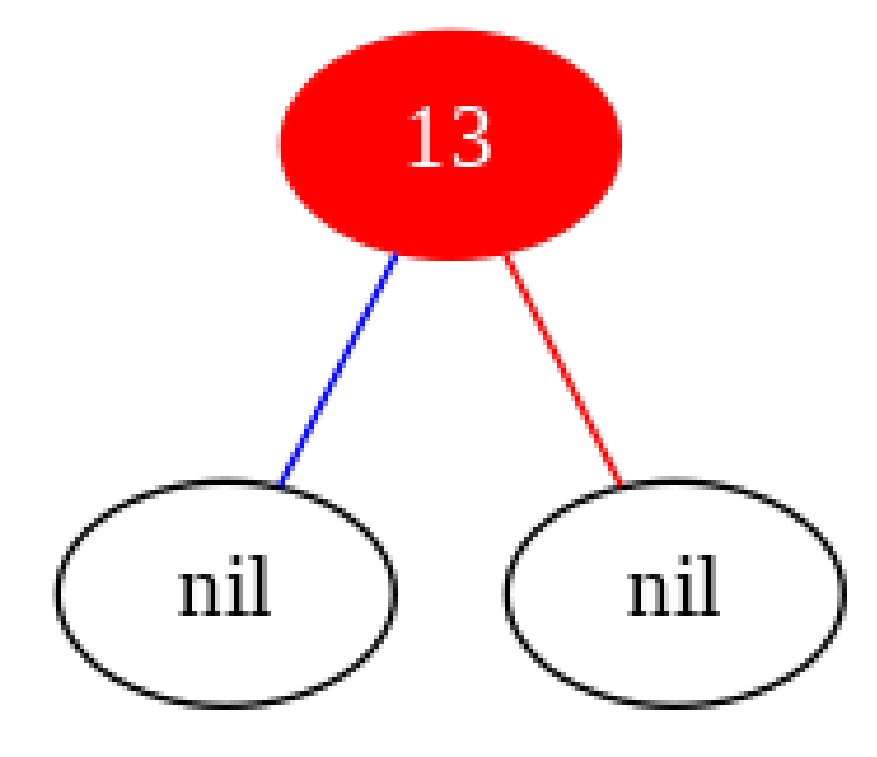

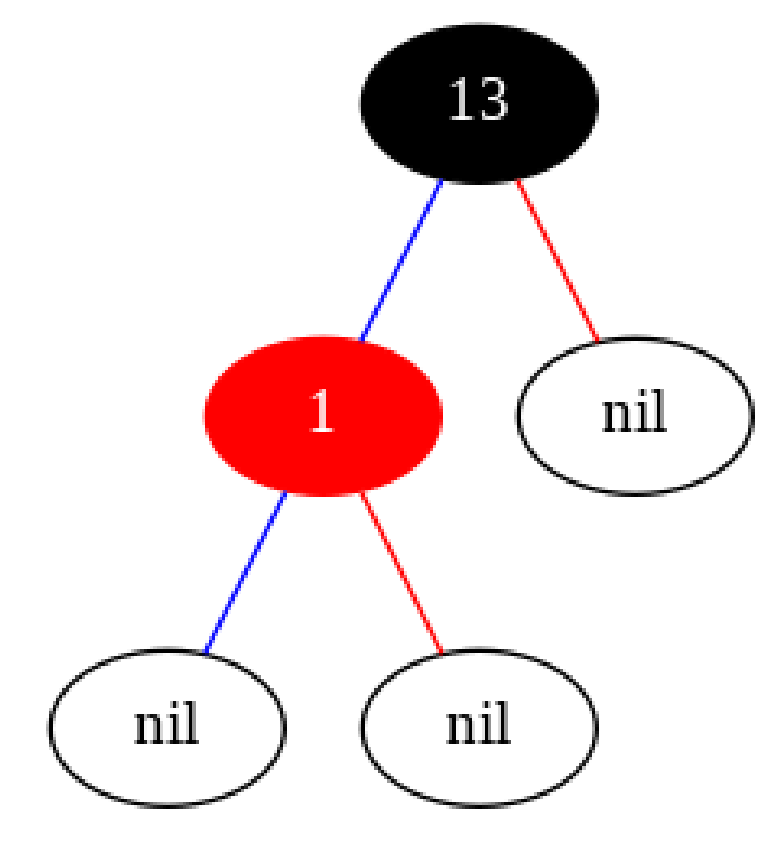

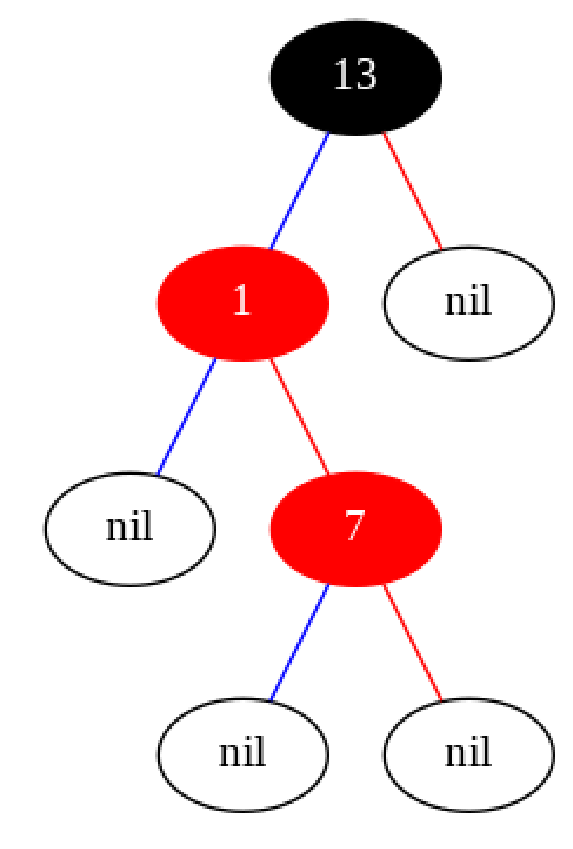

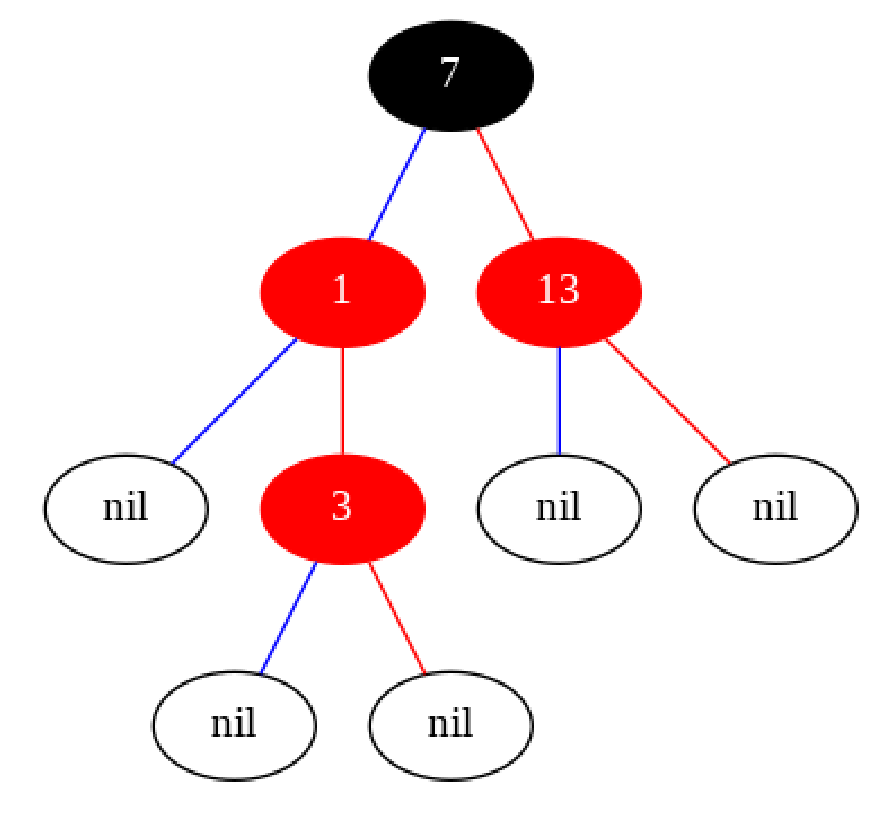

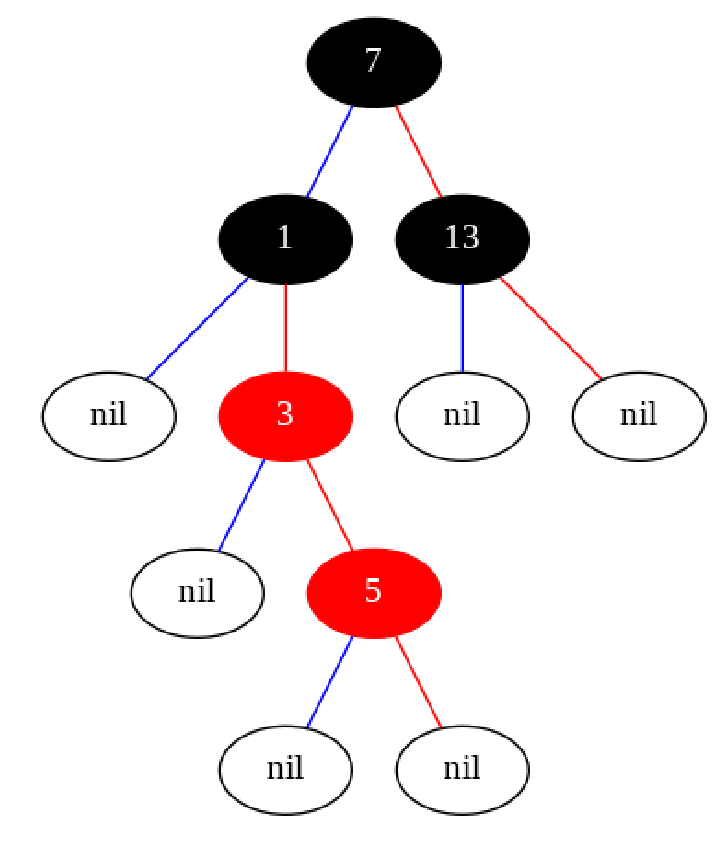

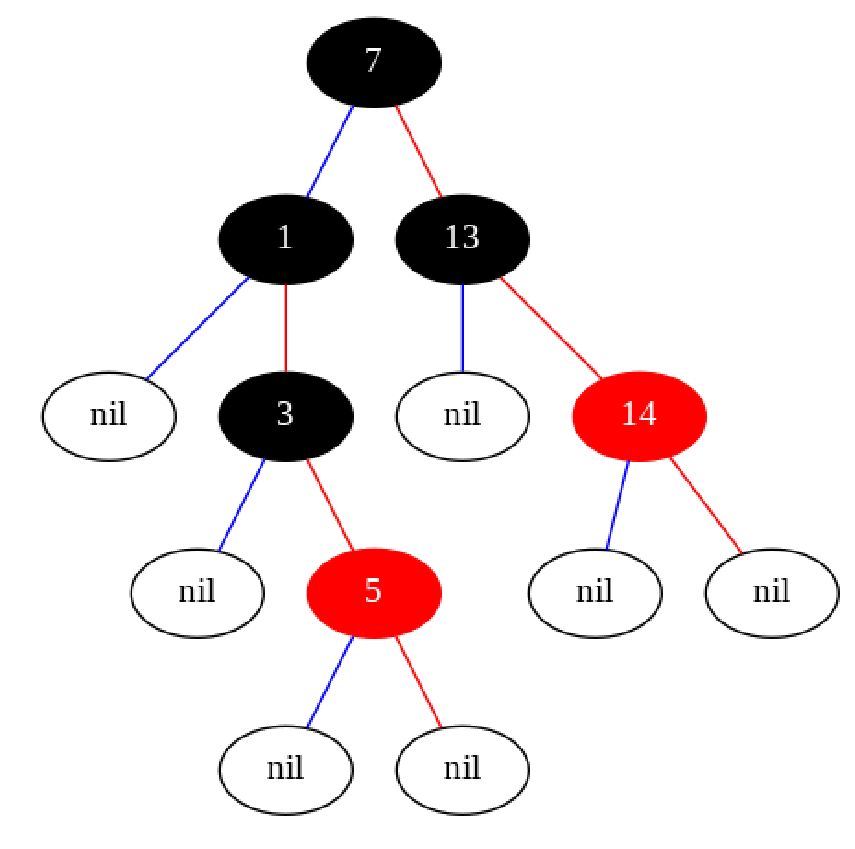

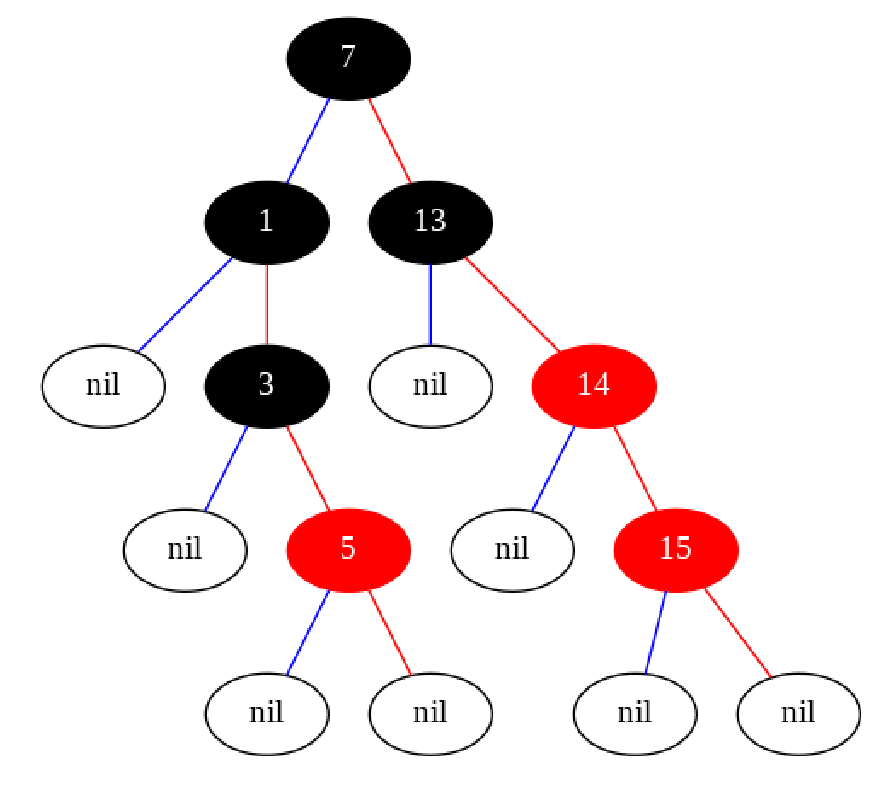

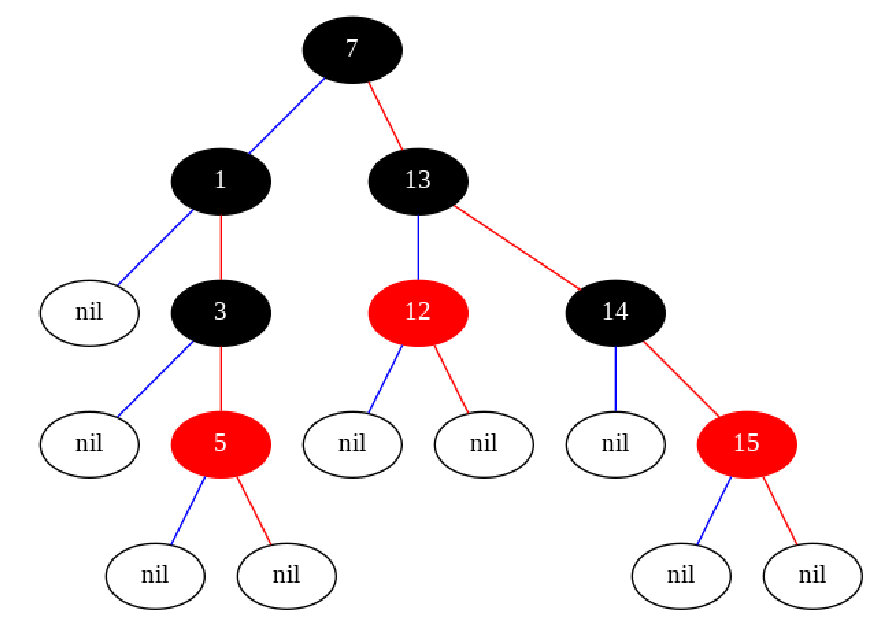

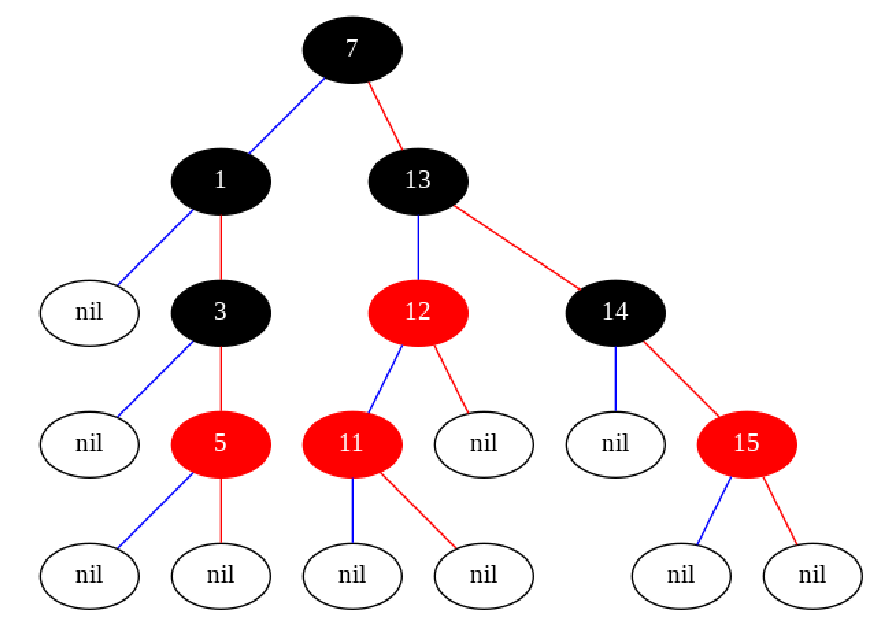

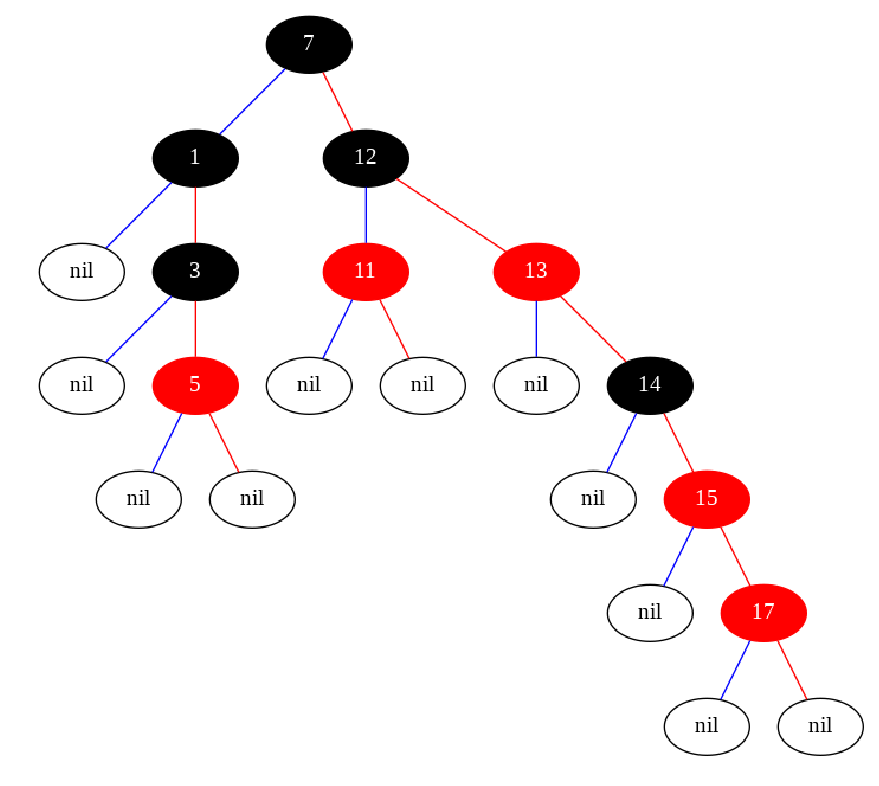

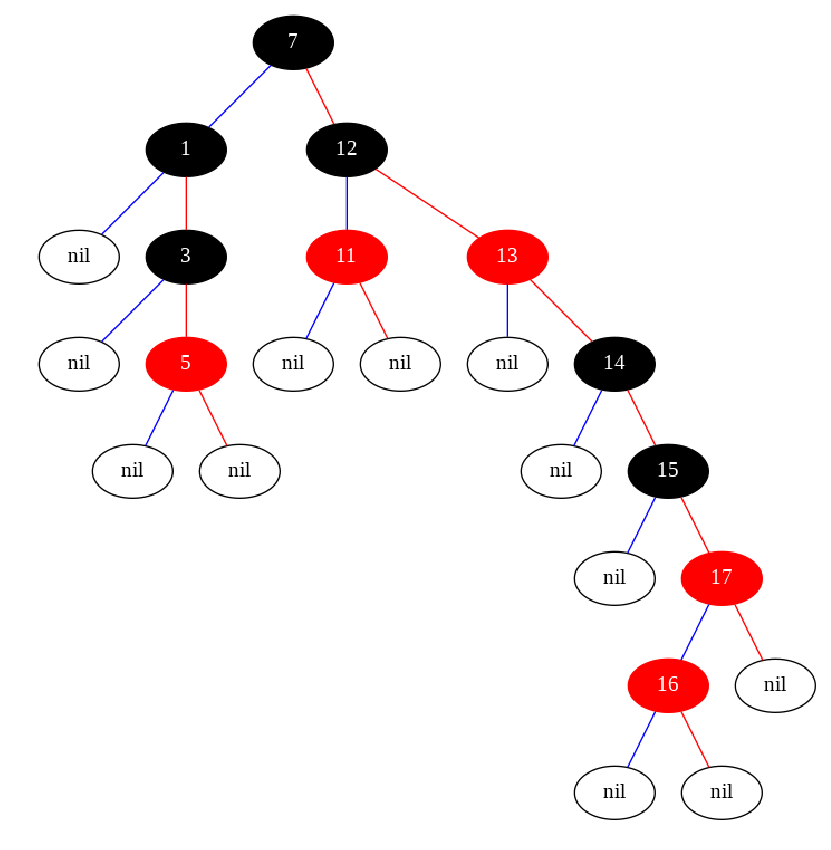

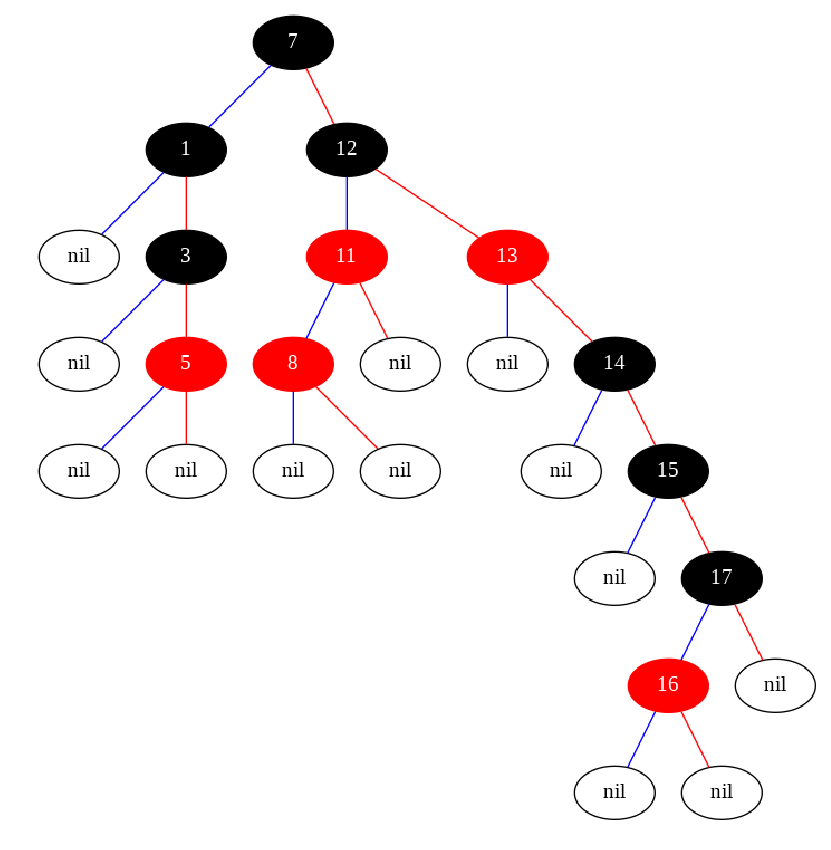

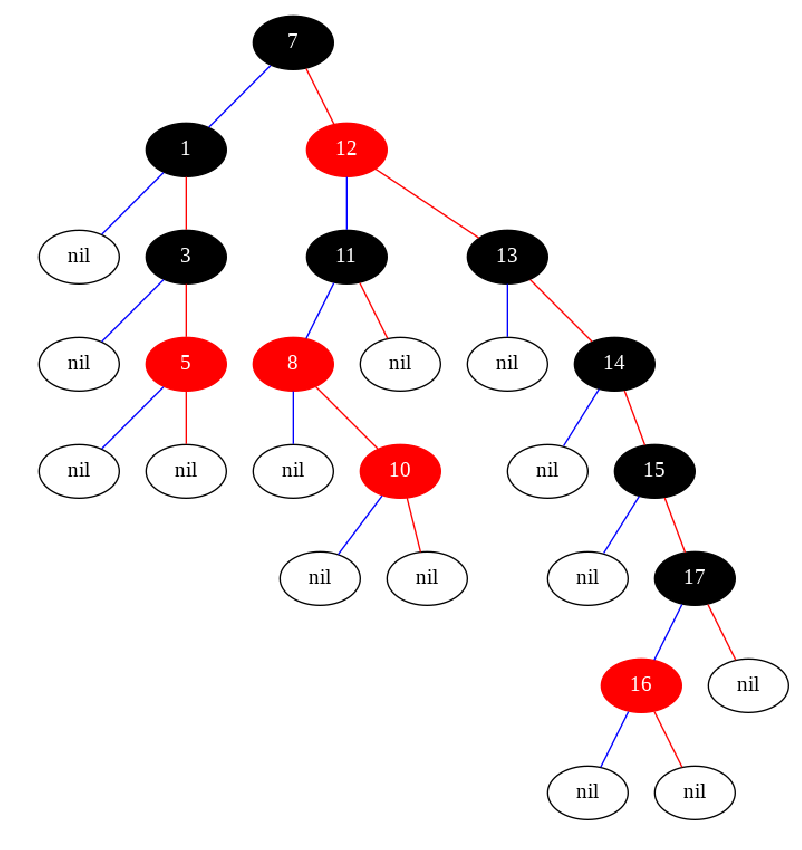

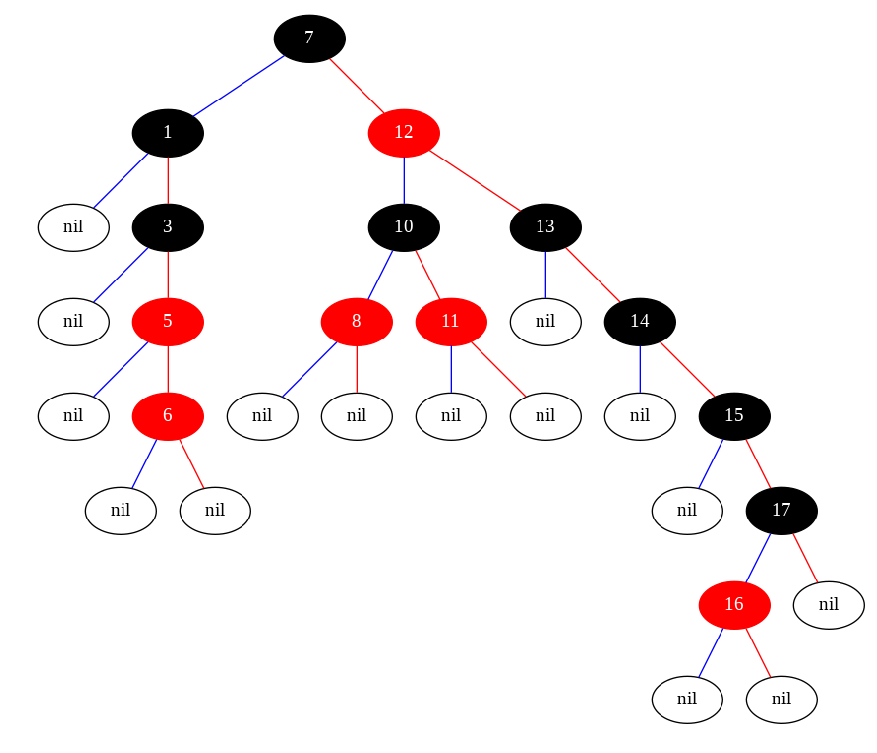

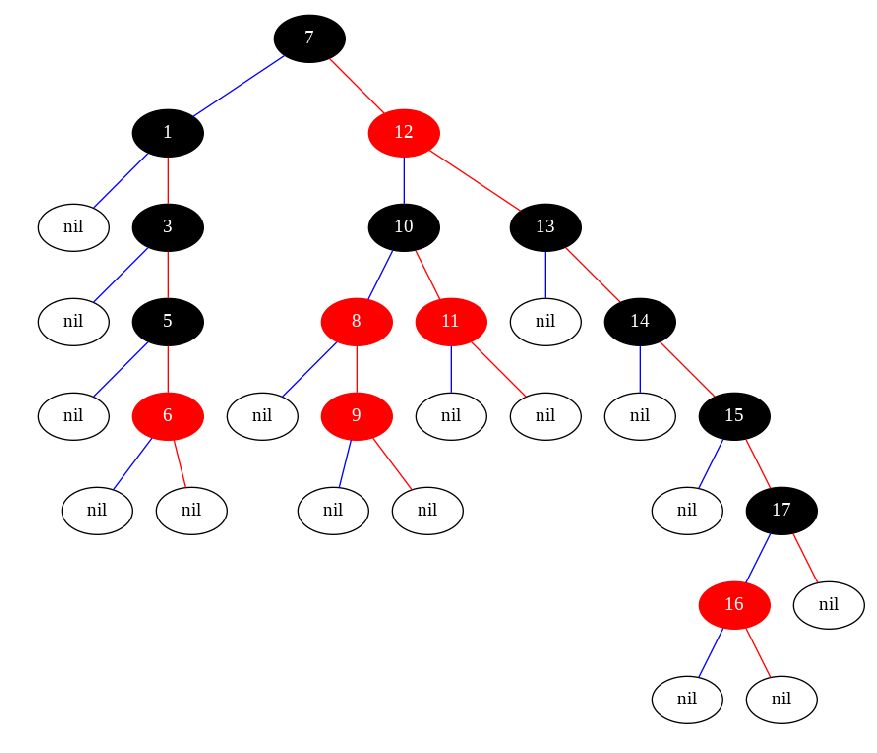

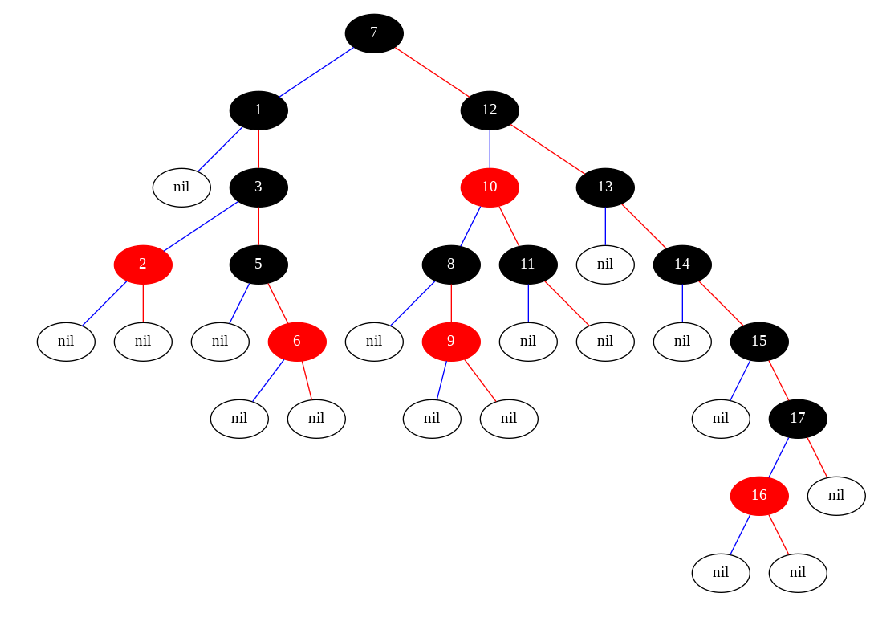

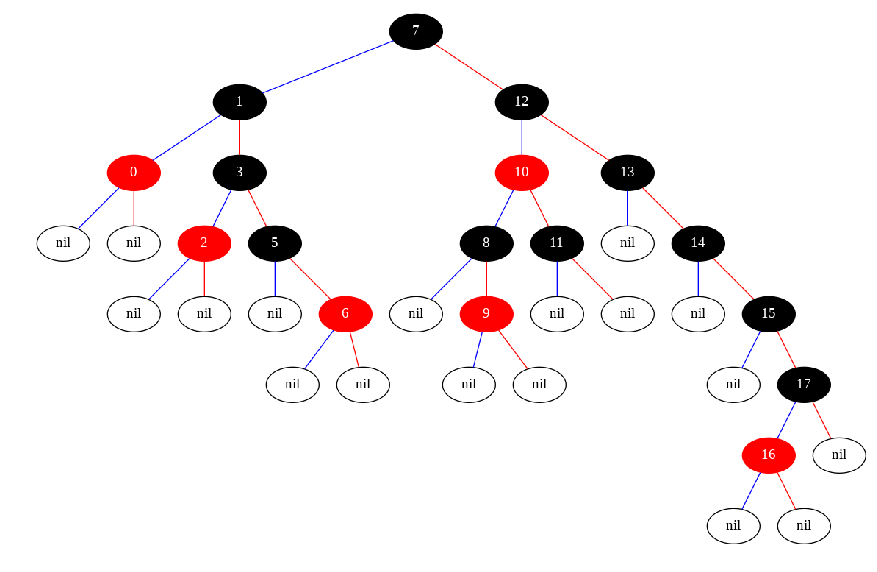

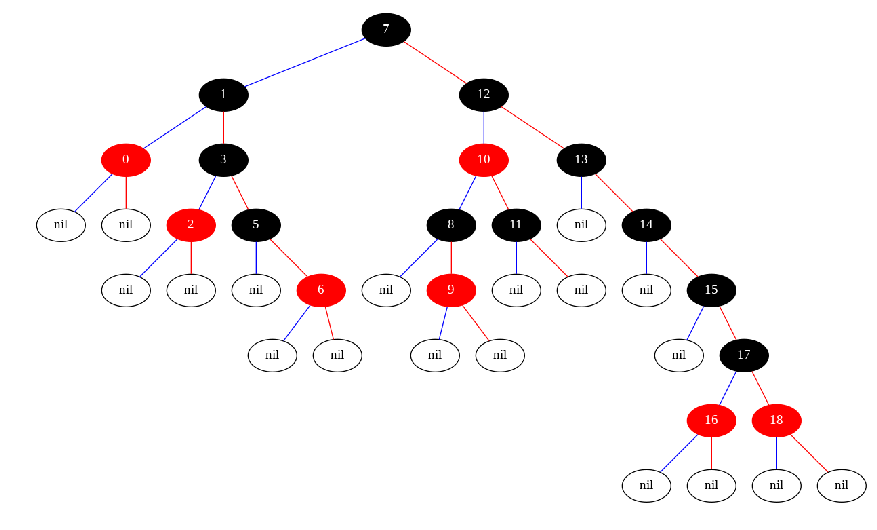

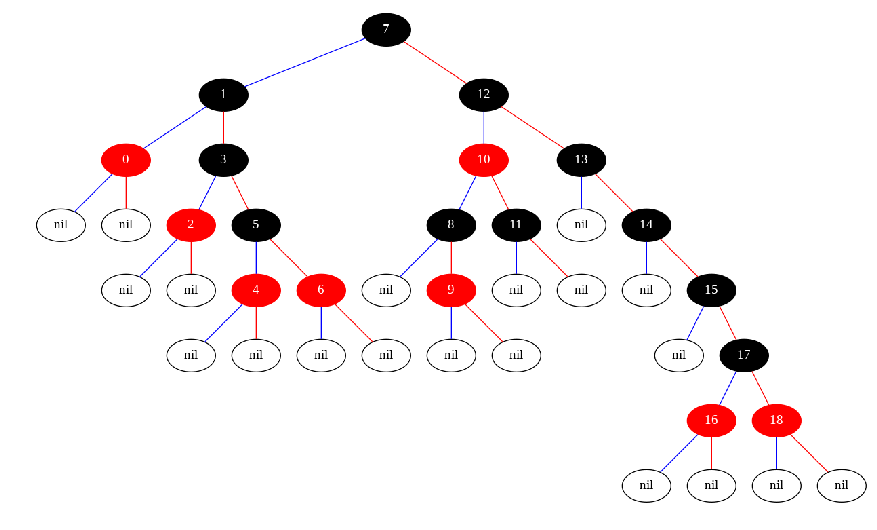

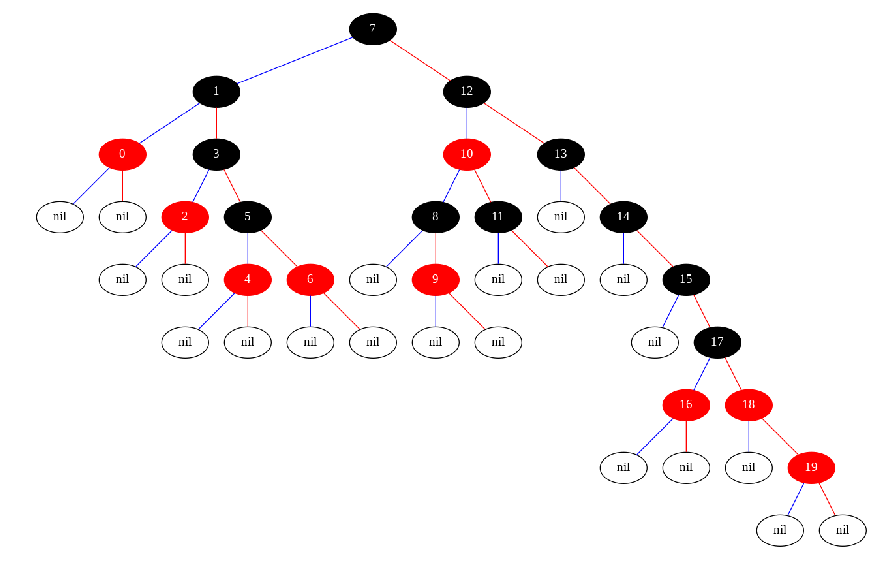

0 1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 

In [6]:
T = Tree()

data = list(range(20))
random.shuffle(data)
print(data)

for i in data:
  z = Node(i)
  RBTreeInsert(T,z)

InorderTreeWalk(T, T.root)

[10, 9, 8, 7]


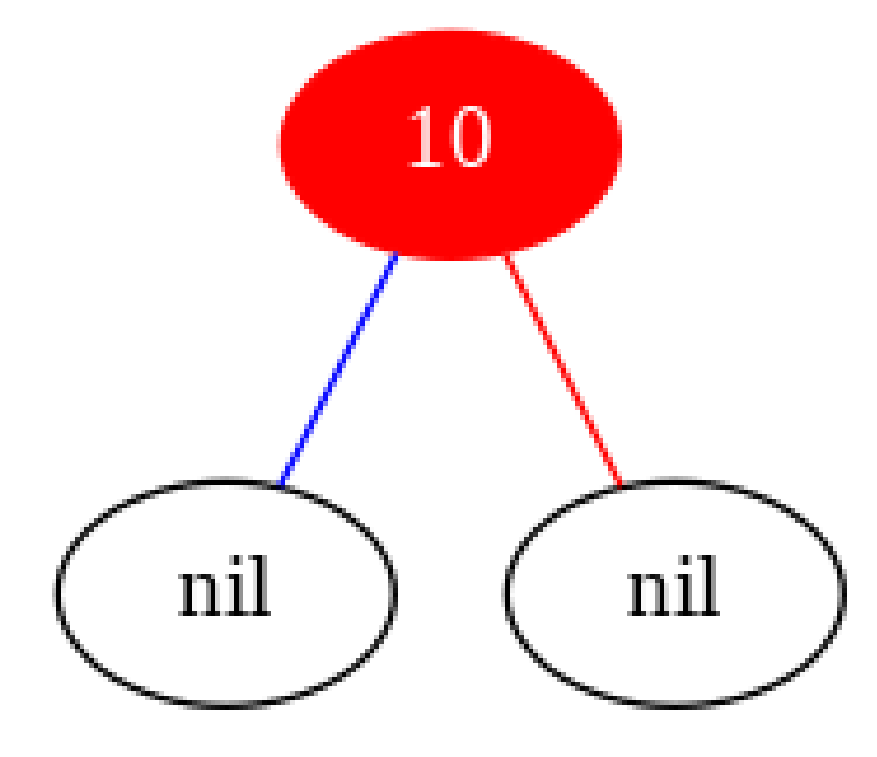

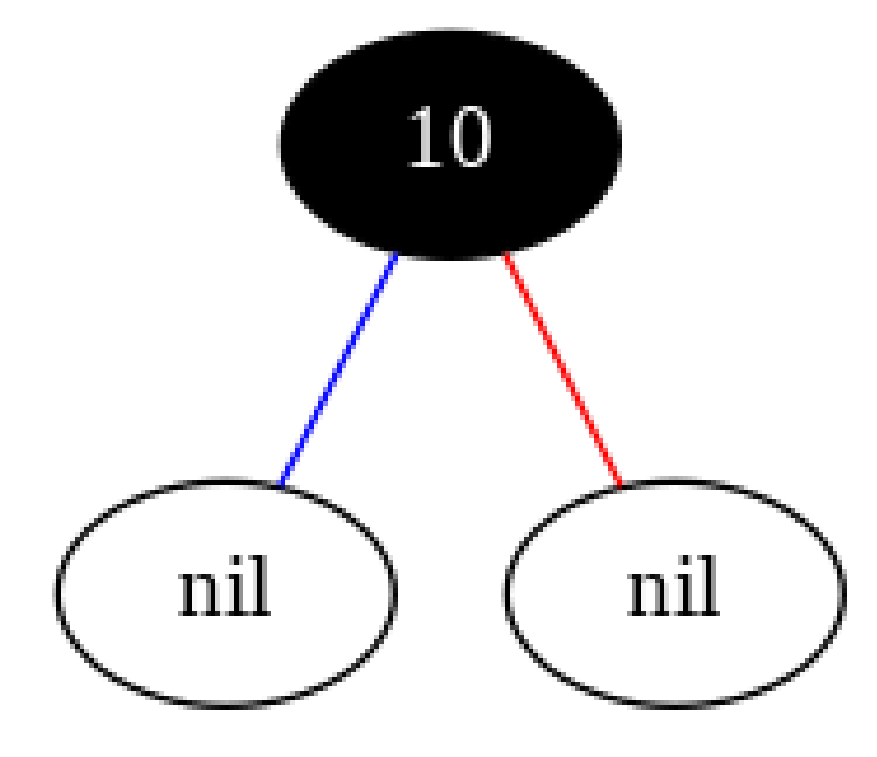

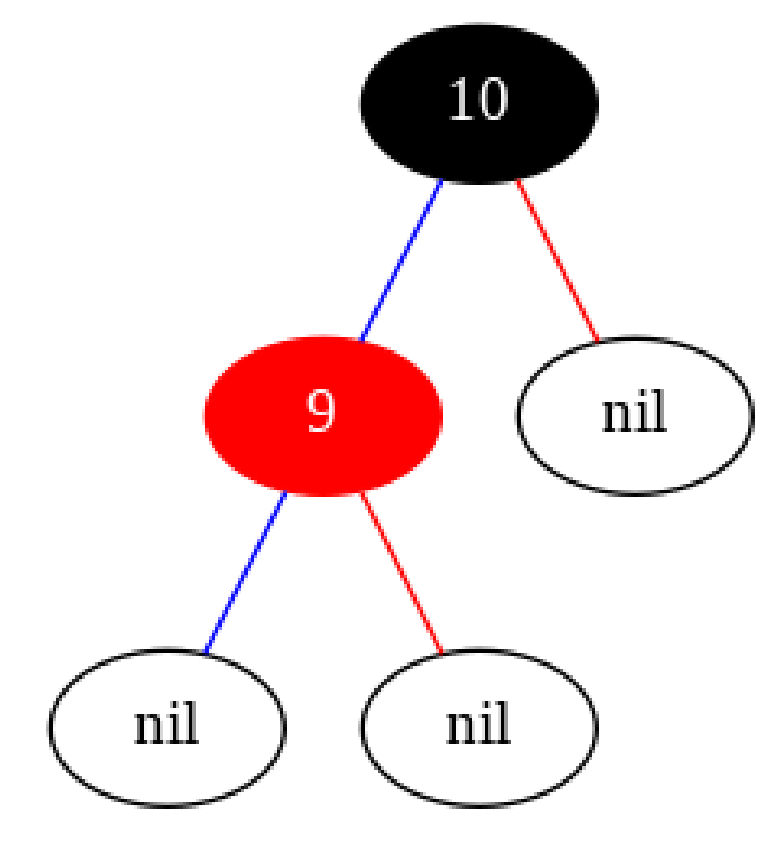

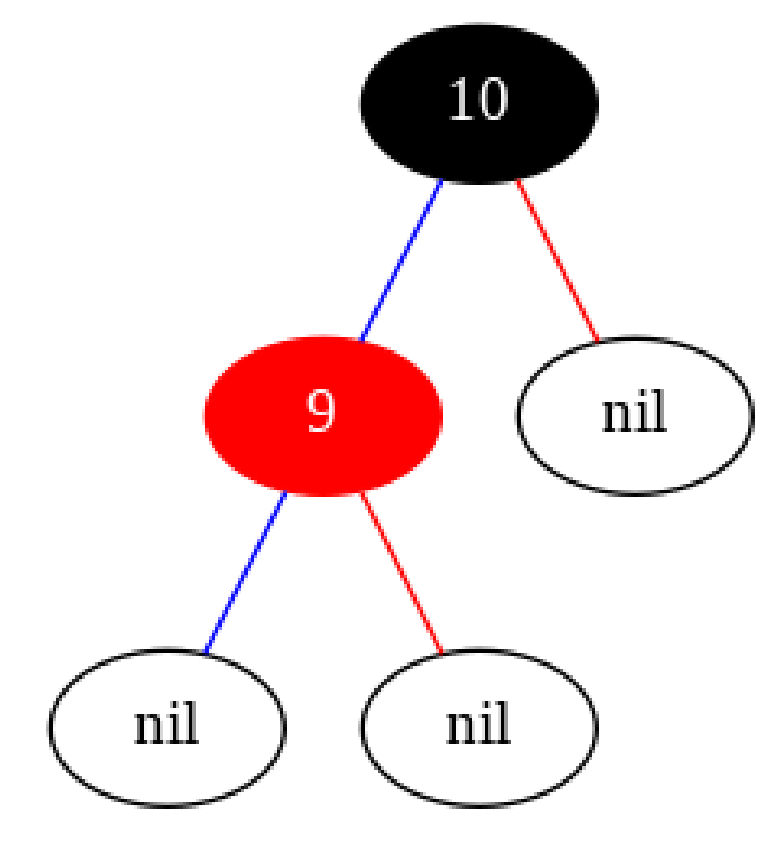

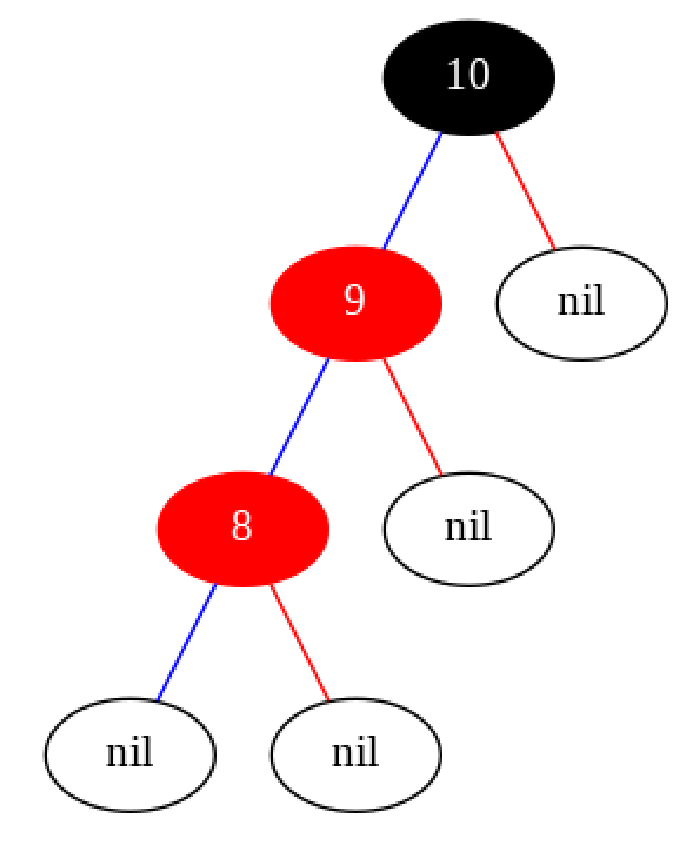

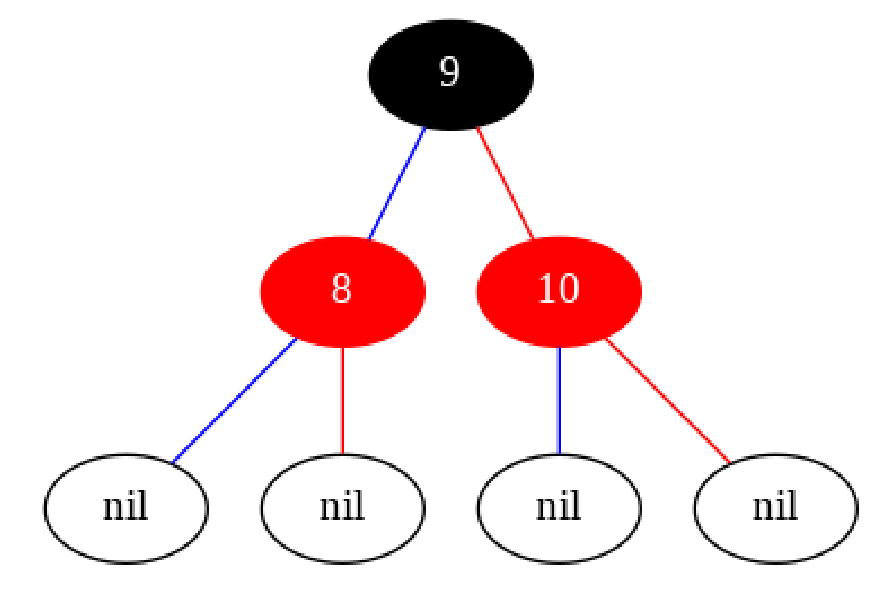

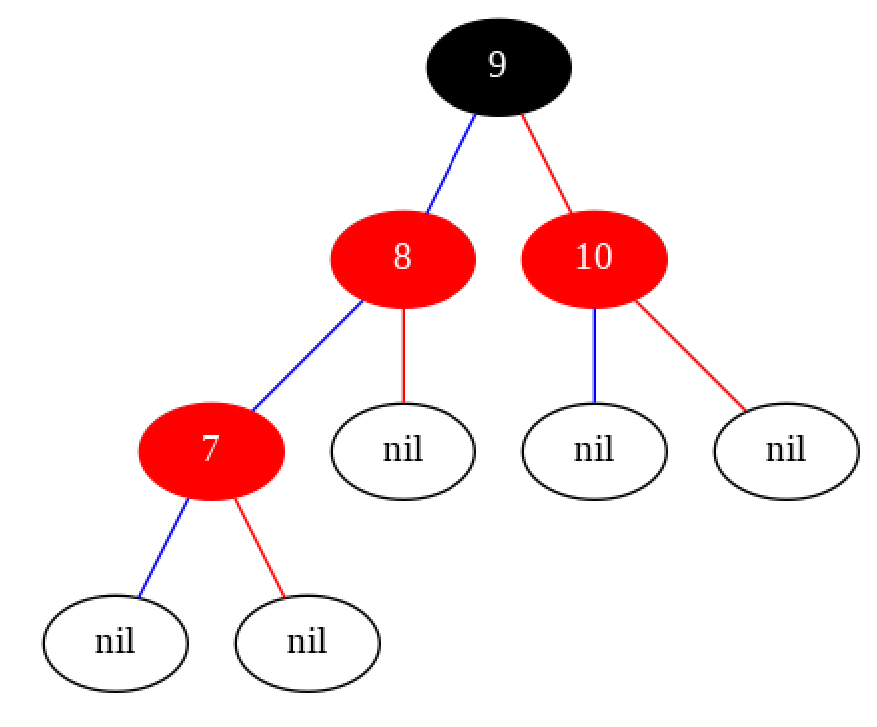

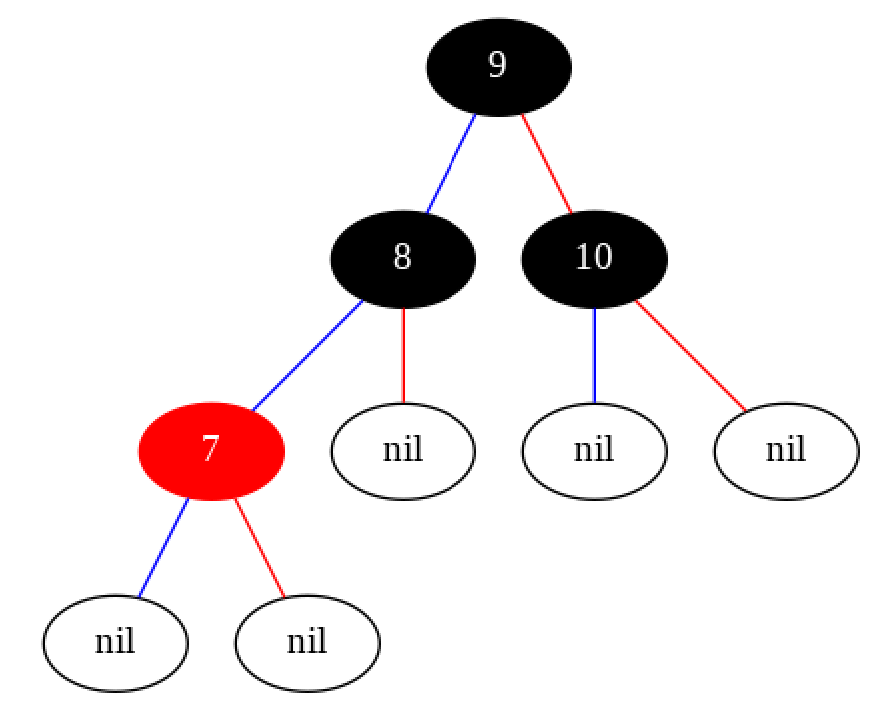

7 8 9 10 

In [7]:
T = Tree()

data = [10, 9, 8, 7]
print(data)

for i in data:
  z = Node(i)
  RBTreeInsert(T,z)
  DisplayTree(T)

InorderTreeWalk(T, T.root)

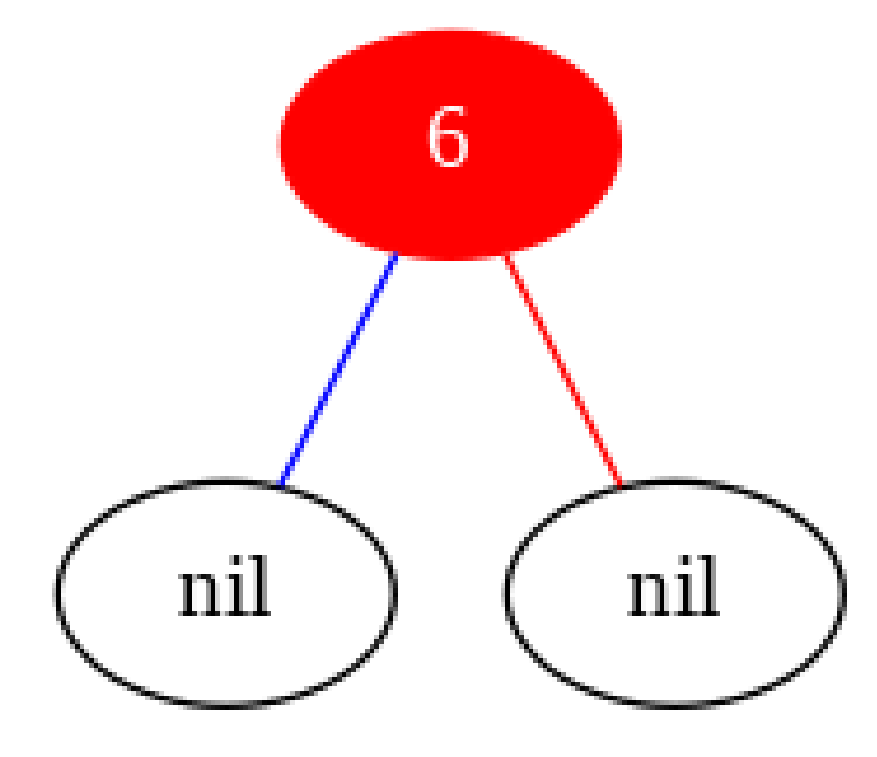

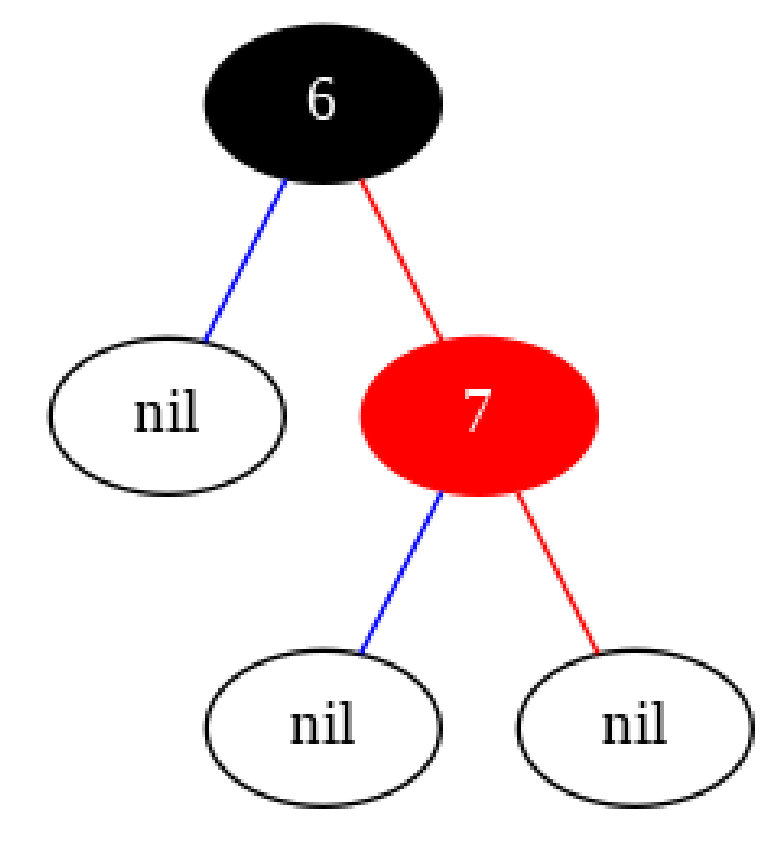

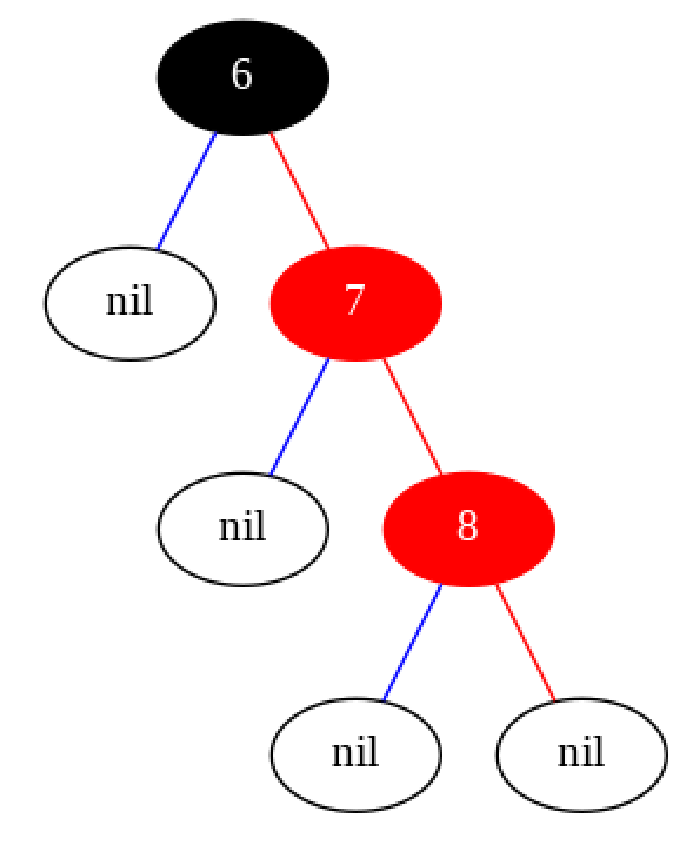

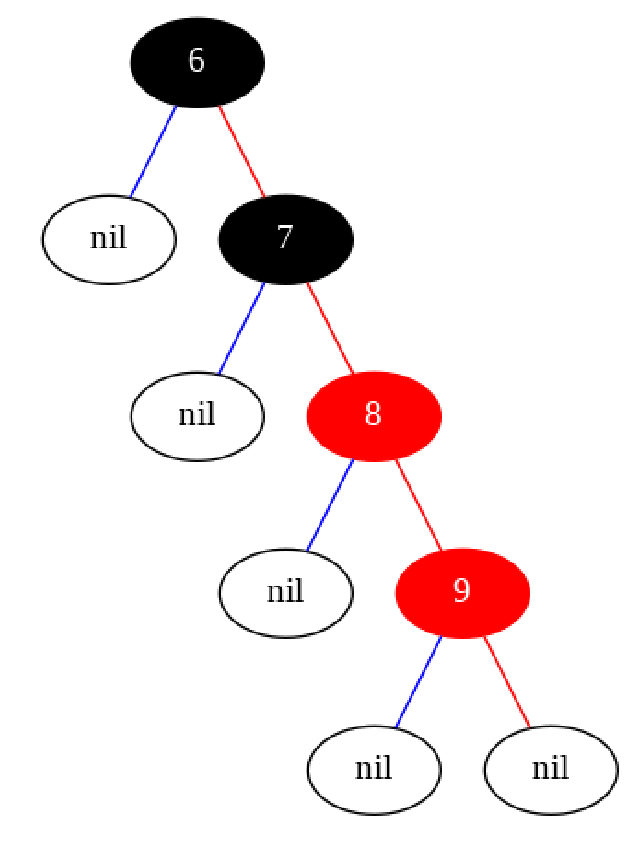

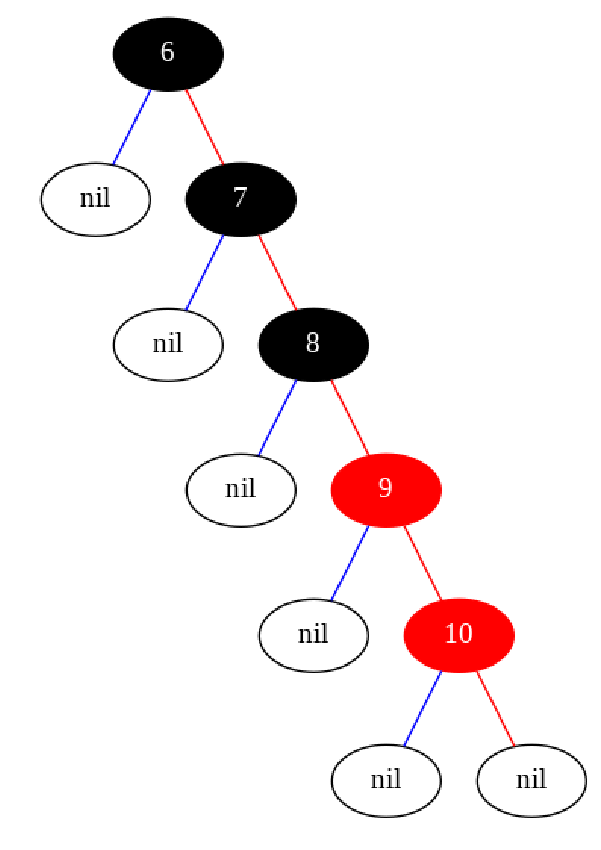

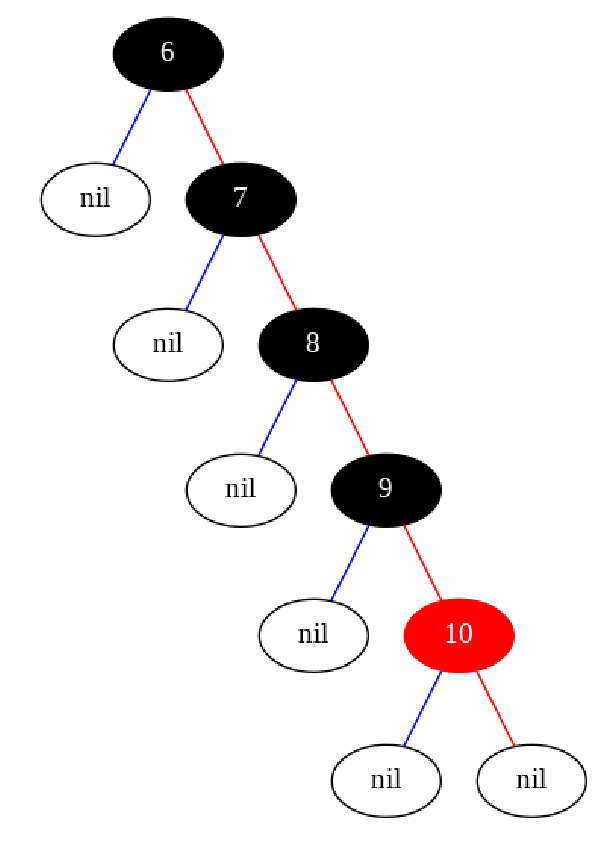

6 7 8 9 10 

In [8]:
T = Tree()
data = [6, 7, 8, 9, 10]
for i in data:
  z = Node(i)
  RBTreeInsert(T,z)

DisplayTree(T)

InorderTreeWalk(T, T.root)

In [9]:
T = Tree()
T.root = None

data = list(range(1, 11))
random.shuffle(data)
print(data)

for i in data:
  z = Node(i)
  TreeInsert(T,z)
  DisplayTree(T)

 

[1, 5, 9, 3, 8, 4, 6, 10, 7, 2]


NameError: ignored

In [0]:
def TreeSearch(x, k):
  if x==None or x.key == k:
    return x
  if k < x.key:
    return TreeSearch(x.left, k)
  else:
    return TreeSearch(x.right, k)
  


In [0]:
z = TreeSearch(T.root, 7)
print (z.key, z.p.key)

In [0]:
def Transplant(T, u, v):
  if u.p == None:
    T.root = v
  elif (u == u.p.left):
    u.p.left = v
  else:
    u.p.right = v
  if (v != None):
    v.p = u.p
    
def TreeMin(x):
  while (x.left != None):
    x = x.left
  return x

def TreeDelete(T, z):
  if (z.left == None):
    Transplant(T, z, z.right)
  elif (z.right == None):
    Transplant(T, z, z.left)
  else:
    y = TreeMin(z.right)
    if (y.p != z):
      Transplant(T, y, y.right)
      y.right = z.right
      y.right.p = y
    Transplant(T, z, y)
    y.left = z.left
    y.left.p = y
  

In [0]:
DisplayTree(T)


In [0]:
z = TreeSearch(T.root,6)
print (z.key, z.p.key)

TreeDelete(T, z)
DisplayTree(T)


In [0]:
InorderTreeWalk(T.root)

In [0]:
data = [3, 12, 19, 2, 8, 11, 9, 6, 0, 13, 1, 17, 4, 7, 15, 18, 5, 14, 10, 16]

T = Tree()
T.root = None

for i in data:
  z = Node(i)
  TreeInsert(T,z)
  
DisplayTree(T)

x = TreeSearch(T.root, 3)

LeftRotate1(T, x)
DisplayTree(T)

InorderTreeWalk(T.root)

x = TreeSearch(T.root, 12)
RightRotate1(T, x)
DisplayTree(T)

InorderTreeWalk(T.root)